# Analyzing Flight Delays and  Cancellations

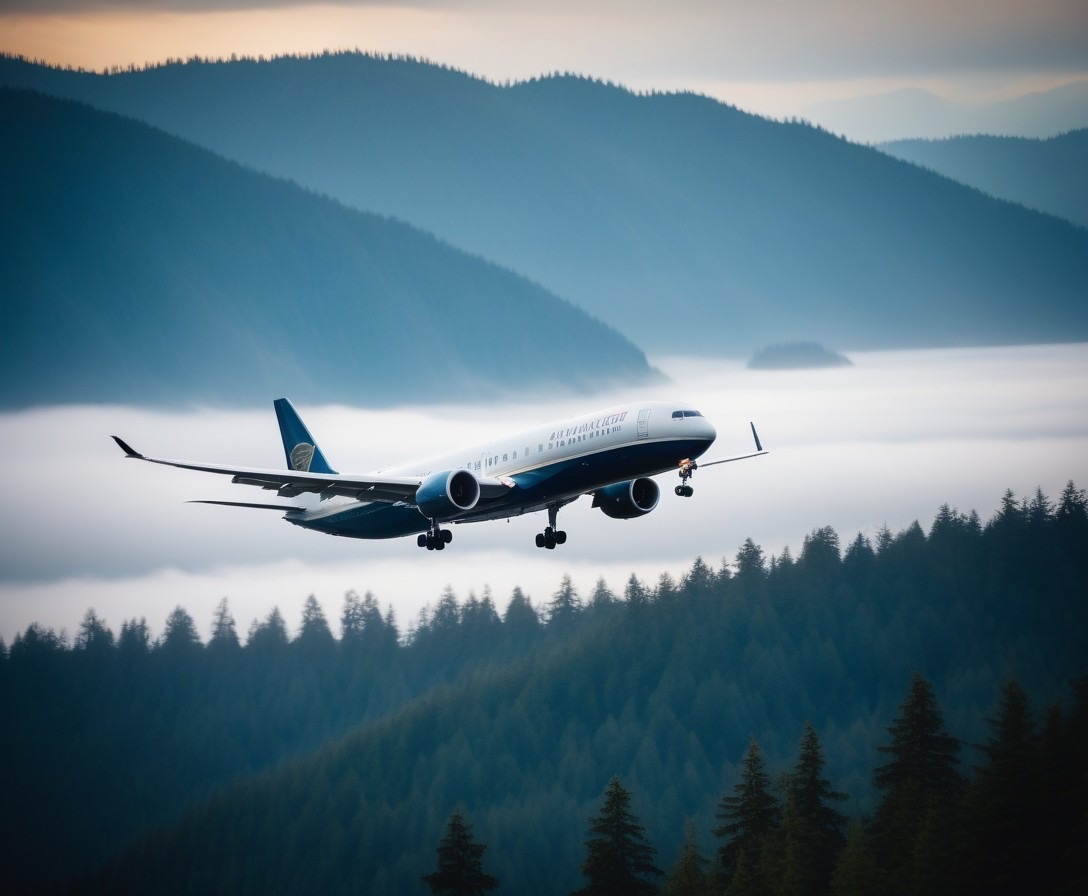

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport):

- `flights2022.csv` contains information about about each flight including

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as

| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

Which airlines and routes (for example "PDX-SFO") are most affected by flight delays, and what impact does wind have on departure delays?

1. Load the two CSV files into separate DataFrames. Explore the data and create any new columns that might benefit your analysis.

2.  For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called routes_delays_cancels, resetting the index after calculating.

3.  For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called airlines_delays_cancels, resetting the index after calculating.

4.  Produce two bar graphs to show (1) the top 9 highest number of cancellations by route in a plot called top9_route_cancels_bar and (2) the top 9 highest average departure delays by airline in a plot called top9_airline_delays_bar.

5.  Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting wind_response to True if so and False if not.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv("flights2022.csv")
flights_weather = pd.read_csv("flights_weather2022.csv")

# Create route column
#flights["route"] = pd.Series(zip(flights["origin"], flights["dest"]))
flights["route"] = "(" + flights["origin"] + ", " + flights["dest"] + ")"



In [2]:
# 2
routes_delays_cancels = flights.groupby("route").agg(
                            avg_dep_delay = ('dep_delay', lambda x: round(x.mean(), 2)),
                            total_cancelations = ('dep_time', lambda x: x.isna().sum())).reset_index()

routes_delays_cancels.to_csv("routes_delays_cancels")

routes_delays_cancels

,route,avg_dep_delay,total_cancelations
0,"(PDX, ABQ)",1.10,2
1,"(PDX, ANC)",4.75,4
2,"(PDX, ATL)",7.02,13
3,"(PDX, AUS)",5.44,5
4,"(PDX, BOI)",5.14,7
...,...,...,...
144,"(SEA, STS)",6.78,5
145,"(SEA, SUN)",5.74,5
146,"(SEA, TPA)",6.54,20
147,"(SEA, TUS)",6.16,13


In [3]:
# 3
airlines_delays_cancels = flights.groupby("airline").agg(
                            avg_dep_delay = ('dep_delay', lambda x: round(x.mean(), 2)),
                            total_cancelations = ('dep_time', lambda x: x.isna().sum())).reset_index()

airlines_delays_cancels.to_csv("airlines_delays_cancels")

airlines_delays_cancels

,airline,avg_dep_delay,total_cancelations
0,Alaska Airlines Inc.,6.74,1300
1,Allegiant Air,26.61,6
2,American Airlines Inc.,20.13,85
3,Delta Air Lines Inc.,10.65,383
4,Frontier Airlines Inc.,14.36,12
5,Hawaiian Airlines Inc.,8.19,4
6,Horizon Air,6.27,238
7,JetBlue Airways,42.14,33
8,SkyWest Airlines Inc.,4.60,165
9,Southwest Airlines Co.,11.41,100


<ipython-input-4-2f9d3aca6fa1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bar_1["route"], rotation=90)


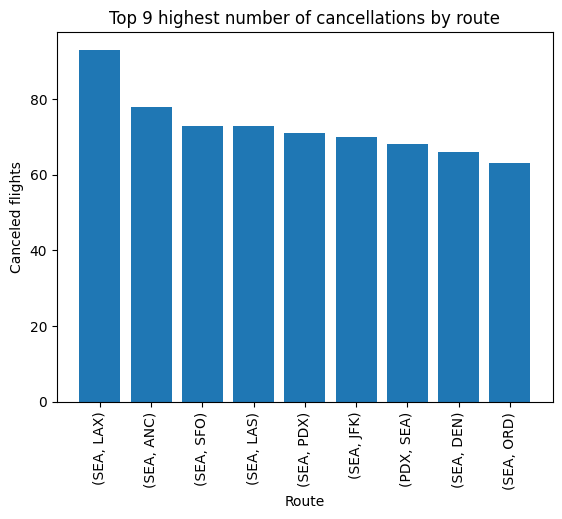

<ipython-input-4-2f9d3aca6fa1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(bar_2["airline"], rotation=90)


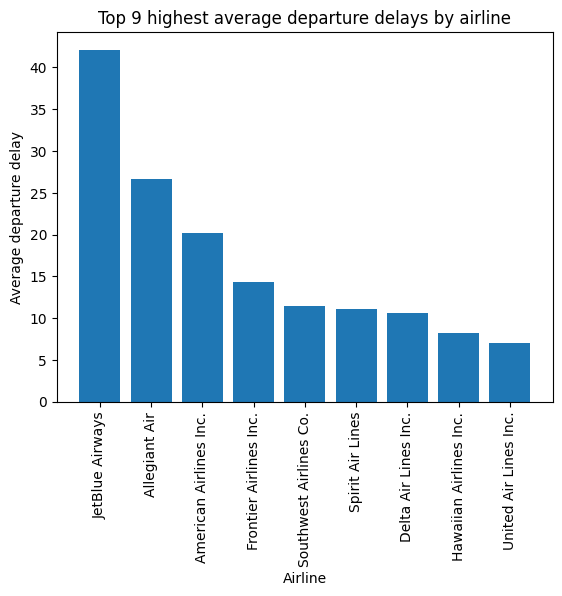

In [4]:
# 4
import matplotlib.pyplot as plt

# Bar plot 1: top 9 highest number of cancellations by route
bar_1  = routes_delays_cancels.sort_values("total_cancelations", ascending= False).head(9)
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(x= bar_1["route"], height= bar_1["total_cancelations"])
ax.set_xlabel("Route")
ax.set_ylabel("Canceled flights")
ax.set_xticklabels(bar_1["route"], rotation=90)
ax.set_title("Top 9 highest number of cancellations by route")
plt.show()


# Bar plot 2: top 9 highest average departure delays by airline
bar_2  = airlines_delays_cancels.sort_values("avg_dep_delay", ascending= False).head(9)

top9_airline_delays_bar, ax2 = plt.subplots()
ax2.bar(x= "airline", height= "avg_dep_delay", data= bar_2)
ax2.set_xlabel("Airline")
ax2.set_ylabel("Average departure delay")
ax2.set_xticklabels(bar_2["airline"], rotation=90)
ax2.set_title("Top 9 highest average departure delays by airline")
plt.show()

In [5]:
# 5.
flights_weather["w_g"] = flights_weather["wind_gust"].apply(lambda x : ">= 10" if x >= 10 else "< 10")

#flights_weather[flights_weather["wind_gust"] > 10]
flights_weather["w_g"]

wind = flights_weather.groupby(["origin","w_g"]).agg(
                            avg_dep_delay = ('dep_delay', lambda x: round(x.mean(), 2)))

wind_response = True

wind

avg_dep_delay
origin w_g                 
PDX    < 10            6.51
       >= 10           9.00
SEA    < 10            7.81
       >= 10           9.00